In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
df = pd.read_csv('San_Diego_Region_SB743_VMT_Maps.csv')
df.head(5)

,OBJECTID,series,scenario_id,city,geo_id,name,persons,vmt,vmt_per_capita,PctMean,pctmean_txt,vmt_type,map_layer,geo,Shape__Area,Shape__Length
0,1,Series 13,720,95.02,9502,95.02,3668,67342.21007,18.359381,1.043147,104.3%,Residents,2012 VMT per Capita by Census Tract,Census Tract,4.837013e+06,9160.417303
1,2,Series 13,720,95.04,9504,95.04,6226,141773.15510,22.771146,1.293815,129.4%,Residents,2012 VMT per Capita by Census Tract,Census Tract,8.326460e+07,56527.434241
2,3,Series 13,720,95.05,9505,95.05,6609,143731.36900,21.747824,1.235672,123.6%,Residents,2012 VMT per Capita by Census Tract,Census Tract,2.507101e+07,23423.135414
3,4,Series 13,720,95.06,9506,95.06,4291,77724.49796,18.113376,1.029169,102.9%,Residents,2012 VMT per Capita by Census Tract,Census Tract,2.164130e+06,7590.512449
4,5,Series 13,720,95.07,9507,95.07,3397,80276.33190,23.631537,1.342701,134.3%,Residents,2012 VMT per Capita by Census Tract,Census Tract,5.776957e+06,10464.821185


In [83]:
df.describe()

,OBJECTID,scenario_id,geo_id,persons,vmt,vmt_per_capita,PctMean,Shape__Area,Shape__Length
count,2714.00000,2714.000000,2714.000000,2714.000000,2.714000e+03,2714.000000,2714.000000,2.714000e+03,2714.000000
mean,1357.50000,566.145910,12902.881356,5235.827561,1.108156e+05,21.670501,0.968782,3.481259e+07,17574.616903
std,783.60864,142.613754,11312.197561,11323.247640,2.421520e+05,7.873077,0.332112,2.237260e+08,33170.516906
min,1.00000,434.000000,100.000000,0.000000,0.000000e+00,0.000000,0.000000,4.757186e+04,1322.264424
25%,679.25000,434.000000,7701.000000,977.000000,2.353875e+04,17.016428,0.791637,1.694728e+06,6152.975277
50%,1357.50000,434.000000,13203.000000,3321.500000,5.950892e+04,20.670000,0.914254,3.113880e+06,8652.332014
75%,2035.75000,720.000000,17501.000000,5458.250000,1.005271e+05,24.790000,1.081201,7.066563e+06,14206.843935
max,2714.00000,720.000000,99900.000000,266259.000000,4.435828e+06,80.760000,4.155396,3.942634e+09,378494.180340


In [93]:
df.shape

(2714, 16)

1) outliers
2) Missing Data
3) Malicious Data
4) Erroneous Data
5) Irrelevant Data
6) Inconsistent Data
7) Formatting

In [103]:
print(df.dtypes)
print(df.isnull().sum())
print('duplicated : ',df.duplicated().sum())

OBJECTID            int64
series             object
scenario_id         int64
city               object
geo_id              int64
name               object
persons             int64
vmt               float64
vmt_per_capita    float64
PctMean           float64
pctmean_txt        object
vmt_type           object
map_layer          object
geo                object
Shape__Area       float64
Shape__Length     float64
dtype: object
OBJECTID          0
series            0
scenario_id       0
city              0
geo_id            0
name              0
persons           0
vmt               0
vmt_per_capita    0
PctMean           0
pctmean_txt       0
vmt_type          0
map_layer         0
geo               0
Shape__Area       0
Shape__Length     0
dtype: int64
duplicated :  0


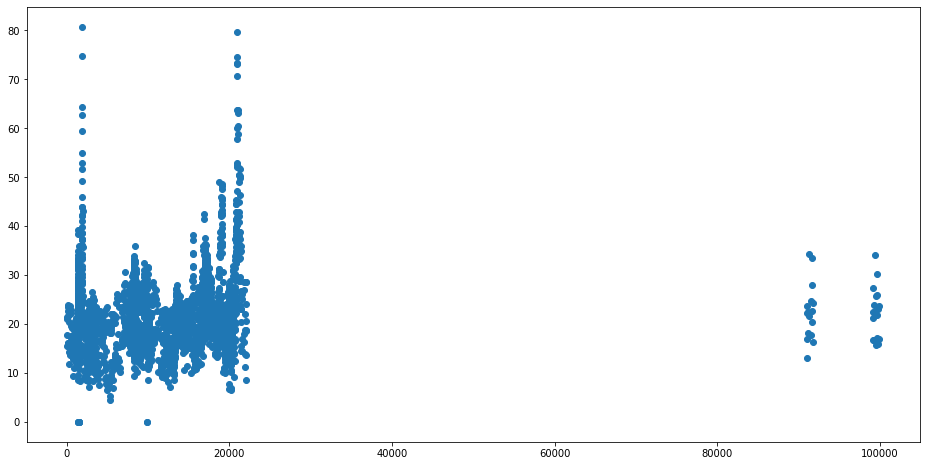

In [104]:
#Scatter plot shows all the data more likely to same distrbibution and no outliers but we can remove points where vmt_per_capita = 0.
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['geo_id'],df['vmt_per_capita'])

In [105]:
df = df[df['vmt_per_capita']>0]

In [107]:
#10 rows are removed.
df.shape

(2704, 16)

# Data Exploration

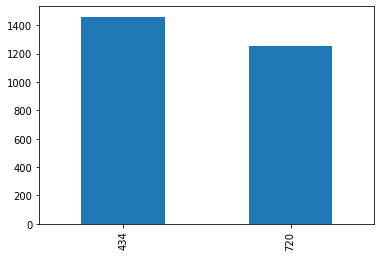

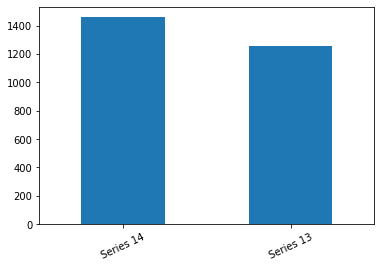

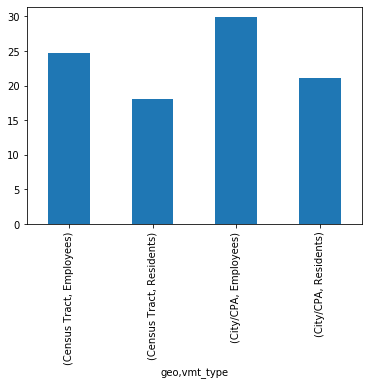

In [82]:
fig1 = plt.figure(1)
scenario_id = df['scenario_id'].value_counts()
scenario_id.plot(kind='bar')
fig1.savefig('scenario_id.png')

fig2 = plt.figure(2)
series_count = df['series'].value_counts()
series_count.plot(kind='bar')
fig2.savefig('series_count.png')
plt.xticks(rotation=25)

fig3 = plt.figure(3)
fig3 = df.groupby(['geo','vmt_type'])['vmt_per_capita'].mean().plot(kind='bar')
fig2.savefig('vmt_per_capita by geo and vmt_type.png')

plt.show()